In [1]:
import pandas as pd
test_data=pd.read_csv('/Users/gauravtyagi/Downloads/Test_data_mart.csv')
train_data=pd.read_csv('/Users/gauravtyagi/Downloads/Train_data_mart.csv')
sample_date=pd.read_csv('/Users/gauravtyagi/Downloads/SampleSubmission_datamart.csv')

In [2]:
import numpy as np
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
# importing linear regressionfrom sklearn
from sklearn.linear_model import LinearRegression

In [3]:
lreg = LinearRegression()

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
#splitting into training and cv for cross validation
X = train_data.loc[:,['Outlet_Establishment_Year','Item_MRP']]

In [6]:
x_train, x_cv, y_train, y_cv = train_test_split(X,train_data.Item_Outlet_Sales)

In [7]:
#training the model
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
#predicting on cv
pred = lreg.predict(x_cv)

In [9]:
#calculating mse
mse = np.mean((pred - y_cv)**2)

In [10]:
mse

1952375.560458812

In [11]:
pred

array([3694.98199601, 2728.78236804, 2467.45772679, ..., 3844.48579814,
        650.92434704, 1312.44663453])

In [12]:
# calculating coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-10.951228
1,Item_MRP,15.558764


In [13]:
lreg.score(x_cv,y_cv)

0.3211770535786521

Text(0.5,1,'Residual plot')

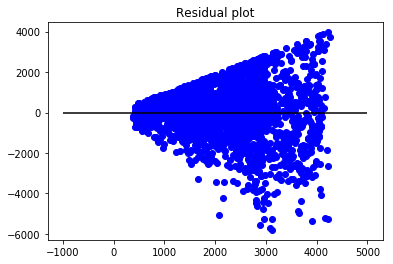

In [24]:
#residual plot
import matplotlib.pyplot as plt
x_plot = plt.scatter(pred, (pred - y_cv), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

In [15]:
from sklearn.linear_model import Ridge,Lasso

In [16]:
rd=Ridge()
las=Lasso()

In [17]:
rd.fit(x_train,y_train)
las.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
rd_out=rd.predict(x_cv)
las_out=las.predict(x_cv)

Text(0.5,1,'Residual plot')

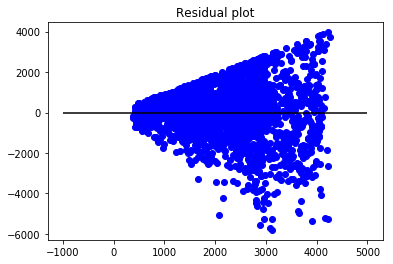

In [19]:
#residual plot
import matplotlib.pyplot as plt
x_plot = plt.scatter(rd_out, (rd_out - y_cv), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

Text(0.5,1,'Residual plot')

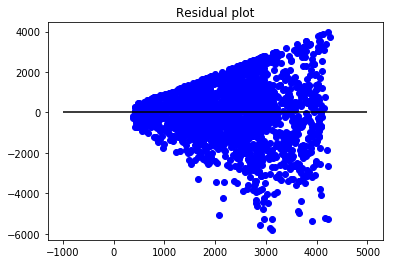

In [20]:
#residual plot
import matplotlib.pyplot as plt
x_plot = plt.scatter(las_out, (las_out - y_cv), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

In [21]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

In [22]:
print('Linear regression mean absolute error = ' + str(mean_absolute_error(pred,y_cv)))
print('Ridge regression mean absolute error = ' + str(mean_absolute_error(rd_out,y_cv)))
print('Lasso regression mean absolute error = ' + str(mean_absolute_error(las_out,y_cv)))

Linear regression mean absolute error = 1025.62557903135
Ridge regression mean absolute error = 1025.625579425268
Lasso regression mean absolute error = 1025.6258443471904


In [23]:
print('Linear regression mean squared error = ' + str(mean_squared_error(pred,y_cv)))
print('Ridge regression mean squared error = ' + str(mean_squared_error(rd_out,y_cv)))
print('Lasso regression mean squared error = ' + str(mean_squared_error(las_out,y_cv)))

Linear regression mean squared error = 1952375.5604588117
Ridge regression mean squared error = 1952375.5554596393
Lasso regression mean squared error = 1952372.65369506


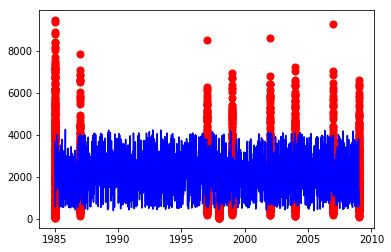

In [29]:
plt.scatter(x_cv['Outlet_Establishment_Year'],y_cv,color='red',s=50)
plotline=np.linspace(x_cv['Outlet_Establishment_Year'].min(),x_cv['Outlet_Establishment_Year'].max(),2131)
plt.plot(plotline,pred,color='blue')
plt.show()

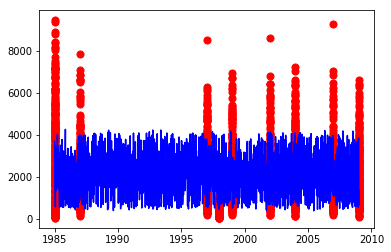

In [30]:
plt.scatter(x_cv['Outlet_Establishment_Year'],y_cv,color='red',s=50)
plotline=np.linspace(x_cv['Outlet_Establishment_Year'].min(),x_cv['Outlet_Establishment_Year'].max(),2131)
plt.plot(plotline,rd_out,color='blue')
plt.show()

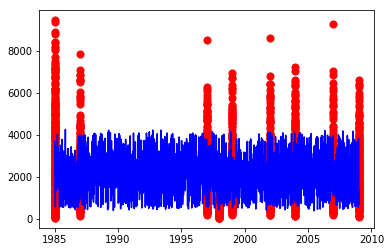

In [31]:
plt.scatter(x_cv['Outlet_Establishment_Year'],y_cv,color='red',s=50)
plotline=np.linspace(x_cv['Outlet_Establishment_Year'].min(),x_cv['Outlet_Establishment_Year'].max(),2131)
plt.plot(plotline,las_out,color='blue')
plt.show()